## Problém:
<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px; color: black">
    
Tento kód predstavuje praktickú časť bakalárskej práce v oblasti umelej inteligencie, nazývanej 

**"Porovnanie rôznych metód vysvetliteľnosti modelov umelej inteligencie na zvolenej množine dát"**

**Hlavným cieľom** tejto práce je zvýšiť dôveru ľudí voči systémom umelej inteligencie pomocou metód Explainable AI (XAI). 

Bol vyvinutý model umelej inteligencie, založený na dátach HELOC od spoločnosti FICO, a jeho výsledky boli analyzované pomocou metód XAI, aby sa zabezpečilo pochopenie a vysvetlenie rozhodnutí prijatých modelom.
</div>

## Dataset:

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">

- **RiskPerformance:** Stav platby (12-36 mesiacov). Môže nadobúdať hodnoty "Good" alebo "Bad"."Bad": Klient aspoň raz meškal s platbami na dobu najmenej 90 dní v období od 12 do 36 mesiacov dozadu.
    
- **ExternalRiskEstimate:** Konsolidovaná verzia rizikových markerov - zhrnuté hodnotenie rôznych faktorov rizika na posúdenie celkového rizika klienta.
    
- **MSinceOldestTradeOpen:** Počet mesiacov, ktoré uplynuli od otvorenia najstaršej obchodnej transakcie pre každého klienta.
    
- **MSinceMostRecentTradeOpen:** Počet mesiacov, ktoré uplynuli od poslednej obchodnej transakcie pre každého klienta.
    
- **AverageMInFile:** Priemerné obdobie pozorovania klienta.
        
- **NumSatisfactoryTrades:** Počet obchodov, ktoré boli zaplatené bez omeškania.
    
- **NumTrades60Ever2DerogPubRec:** Počet obchodov, ktorých platba bola oneskorená aspoň o 60 dní.
    
- **NumTrades90Ever2DerogPubRec:** Počet obchodov, ktorých platba bola oneskorená aspoň o 90 dní.
    
- **PercentTradesNeverDelq:** Percento obchodov, ktorých platba prebehla bez oneskorenia.
   
- **MSinceMostRecentDelq:** Počet mesiacov, ktoré uplynuli od poslednej transakcie, kde bola platba oneskorená.

- **MaxDelq2PublicRecLast12M:** Najdlhšie oneskorenie v platbe, ktoré sa udialo počas posledných 12 mesiacov.
    
- **MaxDelqEver:** Najdlhšie oneskorenie v platbe za celé obdobie.

- **NumTotalTrades:** Počet všetkých obchodov klienta.
    
- **NumTradesOpeninLast12M:** Počet obchodov vykonaných za posledných 12 mesiacov.
    
- **PercentInstallTrades:** Percento obchodov zaplatených na splátky.
    
- **MSinceMostRecentInqexcl7days:** Počet mesiacov od posledného dopytu na subjekt, pričom sú vylúčené posledné 7 dní s cieľom odstránenia dopytov, ktoré by mohli byť spojené so skúmaním cien pri nákupe.
    
- **NumInqLast6M:** Počet dotazov vykonaných voči subjektu za posledných 6 mesiacov.
    
- **NumInqLast6Mexcl7days:** Počet dotazov vykonaných voči subjektu za posledných 6 mesiacov, pričom sú vylúčené posledné 7 dní s cieľom odstránenia dopytov, ktoré by mohli byť spojené so skúmaním cien pri nákupe.
    
- **NetFractionRevolvingBurden:** Množstvo peňazí, ktoré zostáva nezaplatené na kreditnej karte na konci obdobia platby účtu, delené kreditným limitom.
   
- **NetFractionInstallBurden:** Zostávajúci zostatok úveru, delený prvotnou sumou úveru.
    
- **NumRevolvingTradesWBalance:** Počet kreditných obchodov, kde zostáva nezaplatený zostatok po každej platbe.
    
- **NumInstallTradesWBalance:** Počet obchodov so splátkami, kde zostáva nezaplatený zostatok po každej platbe.
    
- **PercentTradesWBalance:** Percento z celkového počtu kreditných obchodov, kde zostáva nezaplatený zostatok po každej platbe.
    
- **NumBank2NatlTradesWHighUtilization:** Počet kreditných kariet, u ktorých zostávajúci dlh predstavuje 75% alebo viac z ich poskytnutého kreditného limitu.

    
</div>

## Obsah:

- Krok 1  | Importovanie knižníc
- Krok 2 | Inicializovanie funkcií
- Krok 3 | Prehľad datasetu
- Krok 4.1 | Kategorické premenné
- Krok 4.2 | Numerické premenné
- Krok 5 | Špeciálne hodnoty
- Krok 5.1 | Odstránenie -9
- Krok 5.2 | Percento chýbajúcich hodnôt pre každú premennú
- Krok 5.3 | Odstránenie NetFractionInstallBurden
- Krok 5.4 | Doplnenie (Imputation)
- Krok 6 | Nahradenie hodnôt Good a Bad hodnotami 1 a 0
- Krok 7 | Rozdelenie na trénovaciu a testovaciu vzorku
- Krok 8 | XGBoost
- Krok 9 | SHAP
- Krok 10 | LIME
- Krok 11 | Anchor
- Krok 12 | PDP
- Krok 13 | ALE
- Krok 14 | Porovnanie metód

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Krok 1  | Importovanie knižníc</h3>
</div>

In [83]:
from IPython.display import clear_output
#Mnohé knižnice zanechávajú pri sťahovaní veľmi dlhé výstupy. na ich odstránenie používame funkciu clear_output.

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
!pip install xgboost
#from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
clear_output()

In [85]:
!pip install plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.base import clone 
%matplotlib inline
purple_cmap = colors.LinearSegmentedColormap.from_list("Purple", ["Purple", "white"])
clear_output()

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Krok 2 | Inicializovanie funkcií</h3>

- **read_summarize:** načíta údaje zo súboru CSV, zobrazí prvých 5 riadkov a základné informácie o dátovom súbore, a potom zobrazí základné štatistické charakteristiky.
    
- **plot_risk_performance:** vykresľuje stĺpcový graf na vizualizáciu rozloženia premennej "RiskPerformance" v DataFrame.
    
- **count_special_values:** počíta špeciálne hodnoty (-9, -8, -7) v každom stĺpci DataFrame a vypisuje výsledok vo forme DataFrame s počtom takýchto hodnôt pre každú premennú.
    
- **remove_minus_nine:** odstraňuje riadky z DataFrame, ktoré obsahujú hodnotu -9.
    
- **replace_special_value_with_median:** nahradí špeciálnu hodnotu v určenom stĺpci DataFrame mediánom tohto stĺpca.
    
- **plot_numerical_distribution:** zobrazuje rozdelenie hodnôt premennej (+ informácie o strednej hodnote a std).
    
- **distribution_special_values:** vytvorí histogramy stĺpcov (s hodnotou -8) + zobrazenie frekvencie výskytu týchto hodnôt.

- **plot_missing_data_percentage:** ukazuje percento chýbajúcich údajov (-8) v každom stĺpci.
    
- **plot_boxplots:** vytvorí boxploty pre premenné v závislosti od premennej RiskPerformance. 
       
- **metrics_calculator:** vypočíta metriky pre model AI.
    
- **model_evaluation:** vytvorí klasifikačný report pre train a test data + Confusion Matrix pre test data.
</div>

In [86]:
def read_summarize(file_path):
    df = pd.read_csv(file_path)
    
    print("Úvod do súboru údajov: prvých 5 riadkov")
    display(df.head())
    print("\n")
    
    print("Informácie o súbore údajov")
    display(df.info())
    print("\n")
    
    print("Základné štatistické charakteristiky údajov:")
    display(df.describe())
    print("\n") 
    
    return df
    

In [87]:
def plot_risk_performance(df):
    counts = df['RiskPerformance'].value_counts() #počet hodnôt v unikátnych údajoch 
                                                  #(koľkokrát sa objavia hodnoty Bad a Good)
    total_count = counts.sum() #počíta celkový počet riadkov
    percentages = counts / total_count * 100 #pomer unikátnych hodnôt k celkovému počtu

    plt.bar(counts.index, counts.values, color=['#9467bd', '#ff7f0e']) #stĺpcový graf
    
    #i - stĺpec grafu. v tomto prípade máme 2 stĺpce, 
    #pretože RiskPerformance môže nadobúdať len 2 jedinečné hodnoty - Bad, Good
    #count - počet jedinečných hodnôt pre daný i 
    
    for i, count in enumerate(counts):
        
        #i - je zodpovedný za umiestnenie textu na osi X (stĺpec Good alebo Bad)
        #count/2 - je zodpovedný za umiestnenie textu na osi Y (v stredu)
        #f'{count}\n{percentages[i]:.2f}%' - text, ktorý sa zobrazuje v stĺpci
        plt.text(i, count/2, f'{count}\n{percentages[i]:.2f}%', ha='center', va='center', color='white')
        
    plt.title('Distribúcia RiskPerformance')
    plt.xlabel('RiskPerformance')
    plt.ylabel('Počet výskytov')
    plt.savefig('risk_performance_good_bad_plot.png')
    plt.show()

In [88]:
def count_special_values(df):
    def count_special_values_in_column(column):
        #počítanie počtu špeciálnych hodnôt
        count_minus_9 = (column == -9).sum()
        count_minus_8 = (column == -8).sum()
        count_minus_7 = (column == -7).sum()
        return count_minus_9, count_minus_8, count_minus_7
    
    #dátový rámec, v ktorom budú uložené výsledky počítania
    result_df = pd.DataFrame(columns=['Variable', '-9', '-8', '-7'])
    
    for column in df.columns:
        count_minus_9, count_minus_8, count_minus_7 = count_special_values_in_column(df[column])
        #zapisujeme hodnoty do dátového rámca 
        df_temp = pd.DataFrame({'Variable': [column], '-9': [count_minus_9], '-8': [count_minus_8], '-7': [count_minus_7]})
        result_df = pd.concat([result_df, df_temp], ignore_index=True)
    
    print(result_df)

In [89]:
#vrátime dátový rámec bez hodnôt -9
def remove_minus_nine(df):
    return df[(df != -9).all(axis=1)]

In [90]:
#nahradiť vybranú špeciálnu hodnotu mediánovou hodnotou vo vybranom stĺpci 
def replace_special_value_with_median(df, column_name, special_value):
    median_value = df[column_name].median()
    df[column_name] = df[column_name].replace(special_value, median_value)
    return df

In [91]:
def plot_numerical_distribution(df, numerical_columns):
    
    #nastavenie rozmerov pre budúci graf
    fig, ax = plt.subplots(figsize=(10, 8))
    for col in numerical_columns:

        #np.histogram - rozdelí premennú do binov (bin_edges) a spočíta počet záznamov v každom bine (counts)
        #range - nastaví rozsah binov 
        #ako dolná hranica sa použije minimálna hodnota v stĺpci zaokrúhlená nadol na najbližšie celé číslo (np.floor(df[col].min()))
        #maximálna hodnota v stĺpci zaokrúhlená nahor na najbližšie celé číslo (np.ceil(df[col].max())) sa použije ako horná hranica
        
        counts, bin_edges = np.histogram(df[col], range=(np.floor(df[col].min()), np.ceil(df[col].max())))
                      
        #vytvorenie histogramu
        sns.histplot(data=df, x=col, bins=bin_edges, ax=ax, edgecolor='none', color='Purple', alpha=0.6)
        ax.set_xlabel(col, fontsize=15)
        ax.set_ylabel('Počet výskytov', fontsize=12)
        ax.set_xticks(np.round(bin_edges, 1))
        ax.set_xticklabels(ax.get_xticks(), rotation=45)
        ax.grid(color='lightgrey')
        
        #zobrazenie priemernej hodnoty a std pomocou LaTeX
        textstr = '\n'.join((
            
            #zobrazenie symbolu μ (r'$\mu=%.2f$'), vypočítame priemer (df[col].mean())
            r'$\mu=%.2f$' % df[col].mean(),
            
            #zobrazenie symbolu σ, vypočítame std (df[col].std())
            r'$\sigma=%.2f$' % df[col].std()
        ))
        
        #zobrazenie μ a σ v rámci na grafe
        ax.text(0.8, 0.9, textstr, transform=ax.transAxes, fontsize=13, verticalalignment='top',
                color='white', bbox=dict(boxstyle='round', facecolor='Purple', edgecolor='white', pad=1))

    plt.title('Rozloženie číselných premenných', fontsize=18) 
    plt.tight_layout() 
    plt.show()


In [92]:
def distribution_special_values(df):
    
    #zapíše stĺpce obsahujúce hodnotu -8 do relevant_columns
    relevant_columns = [column for column in df.columns if -8 in df[column].values]

    for column in relevant_columns:
        plt.figure(figsize=(8, 6))
        
        #vytvorenie histogramu pre daný stĺpec 
        counts, bins, _ = plt.hist(df[column], bins=20, color='purple', edgecolor='black')
        plt.title(f"Rozloženie {column}")
        plt.xlabel(column)
        plt.ylabel("Frekvencia")

        #pridanie textu s počtom hodnôt v stĺpci (hore)
        for i in range(len(counts)):
            
            #vypočítanie stredu aktuálneho binu a umiestnenie textu
            plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, counts[i], str(int(counts[i])), ha='center', va='bottom')

        plt.xticks(bins, rotation=45)
        plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)

        plt.tight_layout()
        plt.show()

In [93]:
def plot_missing_data_percentage(df):
    #Vypočítajte percento údajov obsahujúcich hodnotu -8 pre každú premennú
    missing_percentage = df.isin([-8]).mean() * 100
    #zoradíme zostupne 
    missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
    missing_percentage_sorted = missing_percentage_sorted[missing_percentage_sorted > 0] 

    #vytváranie grafu
    plt.figure(figsize=(10, 6))
    plt.barh(missing_percentage_sorted.index[::-1], missing_percentage_sorted.values[::-1], color='purple')
    plt.title('Percento chýbajúcich údajov')
    plt.ylabel('Premenné')
    plt.xlabel('Percento (%)')
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


In [94]:
def plot_boxplots(df):
    
    sns.set_style("whitegrid")
    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

    #vykreslime premenné v závislosti od RiskPerformance
    sns.boxplot(x='RiskPerformance', y='NumInstallTradesWBalance', data=df, palette='plasma', ax=axs[0,0])
    sns.boxplot(x='RiskPerformance', y='NumBank2NatlTradesWHighUtilization', data=df, palette='plasma', ax=axs[0,1])
    sns.boxplot(x='RiskPerformance', y='MSinceMostRecentInqexcl7days', data=df, palette='plasma', ax=axs[0,2])
    sns.boxplot(x='RiskPerformance', y='MSinceOldestTradeOpen', data=df, palette='plasma', ax=axs[0,3])

    sns.boxplot(x='RiskPerformance', y='NetFractionRevolvingBurden', data=df, palette='plasma', ax=axs[1,0])
    sns.boxplot(x='RiskPerformance', y='MSinceMostRecentDelq', data=df, palette='plasma', ax=axs[1,1])
    sns.boxplot(x='RiskPerformance', y='NumRevolvingTradesWBalance', data=df, palette='plasma', ax=axs[1,2])
    sns.boxplot(x='RiskPerformance', y='PercentTradesWBalance', data=df, palette='plasma', ax=axs[1,3])

    plt.suptitle('Vzťah medzi RiskPerformance a rôznymi premennými', fontsize=16)

    plt.tight_layout()
    plt.show()

In [95]:
#clf - natrénovaný model klasifikátora
#X_test - testovacie údaje
#y_test - pravdivé značky tried pre testovacie údaje
#model_name - názov modelu
def metrics_calculator(clf, X_test, y_test, model_name):
    
    #Získanie predpovedí modelu clf na údajoch X_test pomocou metódy predict
    y_pred = clf.predict(X_test)
    
    #výpočet metrík pre model clf na základe predpovedaných značiek y_pred a skutočných značiek y_test.
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1], average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score','Macro AUC'],
                          columns = [model_name])
    
    #prezentácia metrík v percentuálnom formáte
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [96]:
from sklearn.metrics import plot_confusion_matrix

def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):

    sns.set(font_scale=1.5)
 
    #získanie predpovedí modelu clf na základe trénovacích údajov X_train
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    #výstup klasifikačnej správy pre súbor trénovaných údajov pomocou funkcie classification_report
    print(classification_report(y_train, y_pred_train))

    #získanie predpovedí modelu clf na testovacích údajoch X_test.
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    #výstup klasifikačnej správy pre testovací súbor údajov pomocou funkcie classification_report
    print(classification_report(y_test, y_pred_test))
    print('\n')

    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))
    
    plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)

    #generovanie matice chýb 
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax2.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 3.6)
    table.set_fontsize(12)
    ax2.axis('tight')
    ax2.axis('off')
    ax2.set_title('{} Performance Summary on Test Data'.format(model_name), fontsize=18)

    #zmena farby buniek
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('purple')
              
    plt.tight_layout()
    plt.show()


<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Krok 3 | Prehľad datasetu</h3>
</div>

In [97]:
df = read_summarize("../data/heloc.csv")

Úvod do súboru údajov: prvých 5 riadkov


RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0             Bad                    55                    144   
1             Bad                    61                     58   
2             Bad                    67                     66   
3             Bad                    66                    169   
4             Bad                    81                    333   

   MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                          4              84                     20   
1                         15              41                      2   
2                          5              24                      9   
3                          1              73                     28   
4                         27             132                     12   

   NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec  \
0                            3                            0   
1                            4                            4   
2                            0                            0   
3                            1                            1   
4                            0                            0   

   PercentTradesNeverDelq  MSinceMostRecentDelq  ...  PercentInstallTrades  \
0                      83                     2  ...                    43   
1                     100                    -7  ...                    67   
2                     100                    -7  ...                    44   
3                      93                    76  ...                    57   
4                     100                    -7  ...                    25   

   MSinceMostRecentInqexcl7days  NumInqLast6M  NumInqLast6Mexcl7days  \
0                             0             0                      0   
1                             0             0                      0   
2                             0             4                      4   
3                             0             5                      4   
4                             0             1                      1   

   NetFractionRevolvingBurden  NetFractionInstallBurden  \
0                          33                        -8   
1                           0                        -8   
2                          53                        66   
3                          72                        83   
4                          51                        89   

   NumRevolvingTradesWBalance  NumInstallTradesWBalance  \
0                           8                         1   
1                           0                        -8   
2                           4                         2   
3                           6                         4   
4                           3                         1   

   NumBank2NatlTradesWHighUtilization  PercentTradesWBalance  
0                                   1                     69  
1                                  -8                      0  
2                                   1                     86  
3                                   3                     91  
4                                   0                     80  

[5 rows x 24 columns]



Informácie o súbore údajov
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver              

None



Základné štatistické charakteristiky údajov:


ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
count          10459.000000           10459.000000               10459.000000   
mean              67.425758             184.205373                   8.543455   
std               21.121621             109.683816                  13.301745   
min               -9.000000              -9.000000                  -9.000000   
25%               63.000000             118.000000                   3.000000   
50%               71.000000             178.000000                   5.000000   
75%               79.000000             249.500000                  11.000000   
max               94.000000             803.000000                 383.000000   

       AverageMInFile  NumSatisfactoryTrades  NumTrades60Ever2DerogPubRec  \
count    10459.000000           10459.000000                 10459.000000   
mean        73.843293              19.428052                     0.042738   
std         38.782803              13.004327                     2.513910   
min         -9.000000              -9.000000                    -9.000000   
25%         52.000000              12.000000                     0.000000   
50%         74.000000              19.000000                     0.000000   
75%         95.000000              27.000000                     1.000000   
max        383.000000              79.000000                    19.000000   

       NumTrades90Ever2DerogPubRec  PercentTradesNeverDelq  \
count                 10459.000000            10459.000000   
mean                     -0.142843               86.661536   
std                       2.367397               25.999584   
min                      -9.000000               -9.000000   
25%                       0.000000               87.000000   
50%                       0.000000               96.000000   
75%                       0.000000              100.000000   
max                      19.000000              100.000000   

       MSinceMostRecentDelq  MaxDelq2PublicRecLast12M  ...  \
count          10459.000000              10459.000000  ...   
mean               6.762406                  4.928291  ...   
std               20.501250                  3.756275  ...   
min               -9.000000                 -9.000000  ...   
25%               -7.000000                  4.000000  ...   
50%               -7.000000                  6.000000  ...   
75%               14.000000                  7.000000  ...   
max               83.000000                  9.000000  ...   

       PercentInstallTrades  MSinceMostRecentInqexcl7days  NumInqLast6M  \
count          10459.000000                  10459.000000  10459.000000   
mean              32.166460                     -0.325366      0.868152   
std               20.128634                      6.067556      3.179304   
min               -9.000000                     -9.000000     -9.000000   
25%               20.000000                     -7.000000      0.000000   
50%               31.000000                      0.000000      1.000000   
75%               44.000000                      1.000000      2.000000   
max              100.000000                     24.000000     66.000000   

       NumInqLast6Mexcl7days  NetFractionRevolvingBurden  \
count           10459.000000                10459.000000   
mean                0.812602                   31.629888   
std                 3.143698                   30.060140   
min                -9.000000                   -9.000000   
25%                 0.000000                    5.000000   
50%                 1.000000                   25.000000   
75%                 2.000000                   54.000000   
max                66.000000                  232.000000   

       NetFractionInstallBurden  NumRevolvingTradesWBalance  \
count              10459.000000                10459.000000   
mean                  39.158906                    3.185008   
std                   42.101601                    4.413173

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Záver:</h3>
    
- Dataset obsahuje **10459 záznamov.**
- Celkovo **24 premenných**, z toho 23 sú numerické a 1 kategorická (RiskPerformance).
- Dataset obsahuje **špeciálne hodnoty (-7, -8, -9).**

</div>

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3><a href="https://community.fico.com/s/explainable-machine-learning-challenge?tabset-158d9=ca01a">Vysvetlenia k špeciálnym hodnotám</a></h3>

- **'-9': Žiadne záznamy v úverovej správe**, informácie o kreditnej histórii/score nie sú k dispozícii.

- **'-8': Žiadne aktívne/používané účty/obchody alebo požiadavky.** Neaktívne alebo veľmi staré účty/obchody znamenajú, že zákazník nevykonáva aktívne hľadanie úverov.
    
- **'-7': Podmienka nie je splnená** (napríklad žiadne požiadavky, žiadne meškania).

    
<h4>Príklad</h4>

- Záznam, ktorý nemá zhody v úverovej správe, dostane hodnotu -9.

- Záznam, ktorý má zhody v úverovej správe a nevykazuje žiadnu aktivitu počas posledného roka, dostane hodnotu -8.

- "Podmienka nie je splnená": Funkcia hľadala určitú udalosť v dátach, ale nenašla ju.
Napríklad: Počet požiadaviek za posledných 12 mesiacov, ak posledná požiadavka v zázname bola pred 14 mesiacmi, podmienka "požiadavka za posledných 12 mesiacov" nie je splnená. Aby sme však odlišili tento záznam od toho, ktorý nikdy nemal požiadavky (ktorý dostane hodnotu 0), priradíme mu špeciálnu hodnotu -7.    

</div>

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Krok 4.1 | Kategorické premenné</h3>
</div>

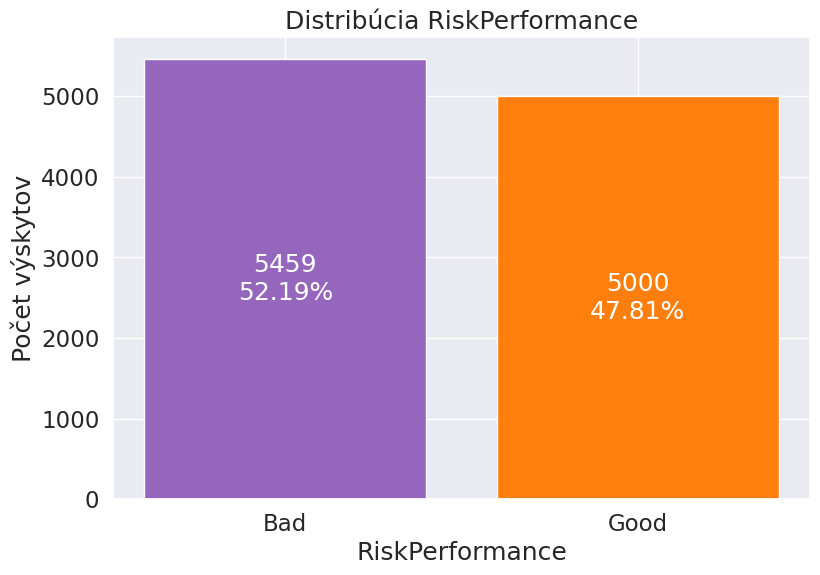

In [98]:
plot_risk_performance(df)

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Záver</h3>

Takmer 53% klientov v datasete má hodnoty Bad, čo naznačuje, že dataset je takmer úplne vyvážený.

</div>


<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Krok 4.2 | Numerické premenné</h3>

Vzhľadom na to, že v datasete je dosť veľa numerických premenných, zobrazíme distribúciu tých najzaujímavejších z nich.

</div>

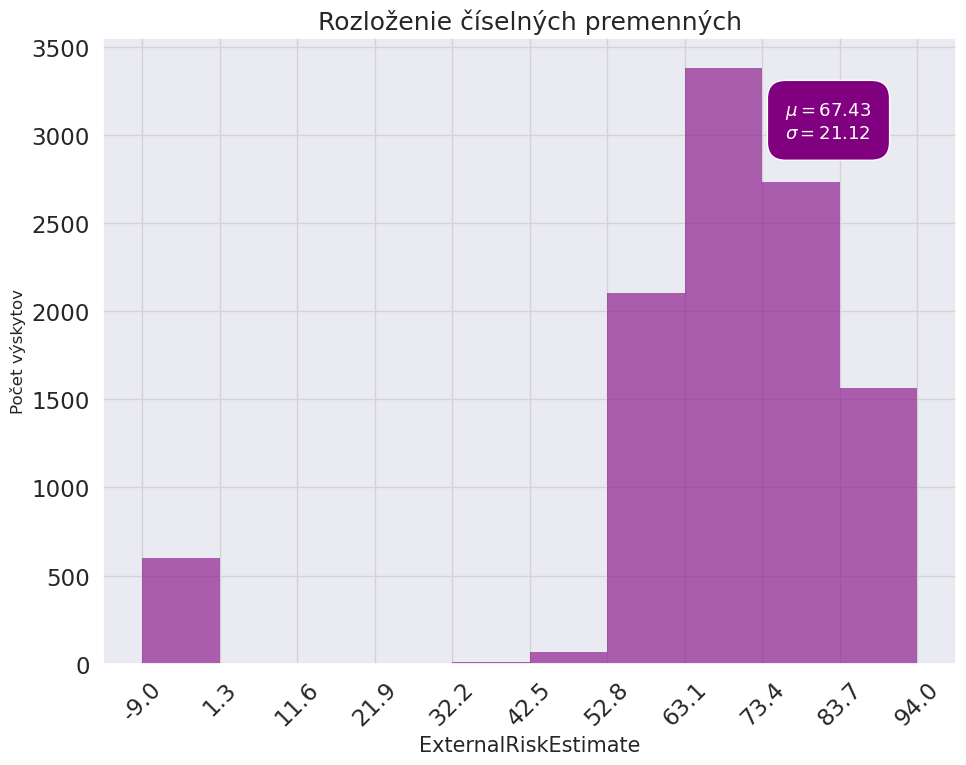

In [99]:
plot_numerical_distribution(df, ['ExternalRiskEstimate'])

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Záver:</h3>
    
- Priemerne ExternalRiskEstimate je približne 67, čo znamená, že väčšina klientov má nízky alebo stredný rizikový profil.

- Graf distribúcie je neštandardný a asymetrický.

</div>

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Krok 5 | Špeciálne hodnoty </h3>
</div>


In [100]:
count_special_values(df)

                              Variable   -9    -8    -7
0                      RiskPerformance    0     0     0
1                 ExternalRiskEstimate  598     0     0
2                MSinceOldestTradeOpen  588   239     0
3            MSinceMostRecentTradeOpen  588     0     0
4                       AverageMInFile  588     0     0
5                NumSatisfactoryTrades  588     0     0
6          NumTrades60Ever2DerogPubRec  588     0     0
7          NumTrades90Ever2DerogPubRec  588     0     0
8               PercentTradesNeverDelq  588     0     0
9                 MSinceMostRecentDelq  588   176  4664
10            MaxDelq2PublicRecLast12M  588     0     0
11                         MaxDelqEver  588     0     0
12                      NumTotalTrades  588     0     0
13              NumTradesOpeninLast12M  588     0     0
14                PercentInstallTrades  588     0     0
15        MSinceMostRecentInqexcl7days  588   476  1855
16                        NumInqLast6M  588     

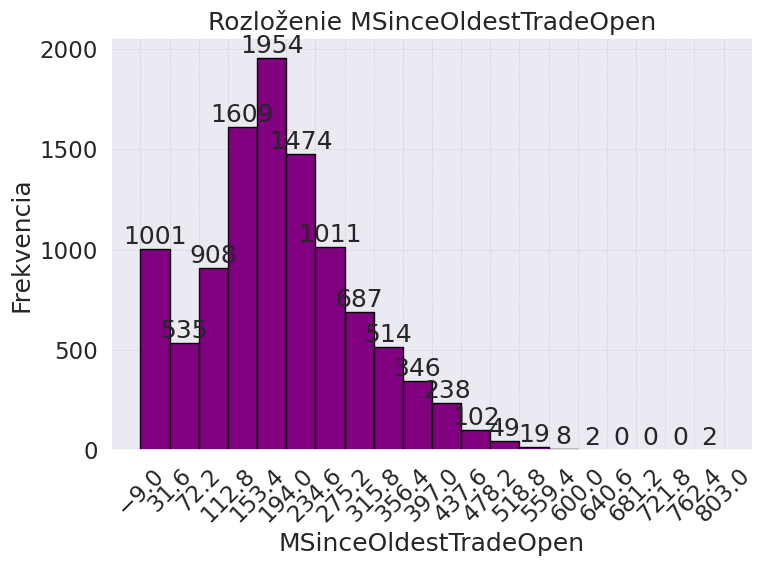

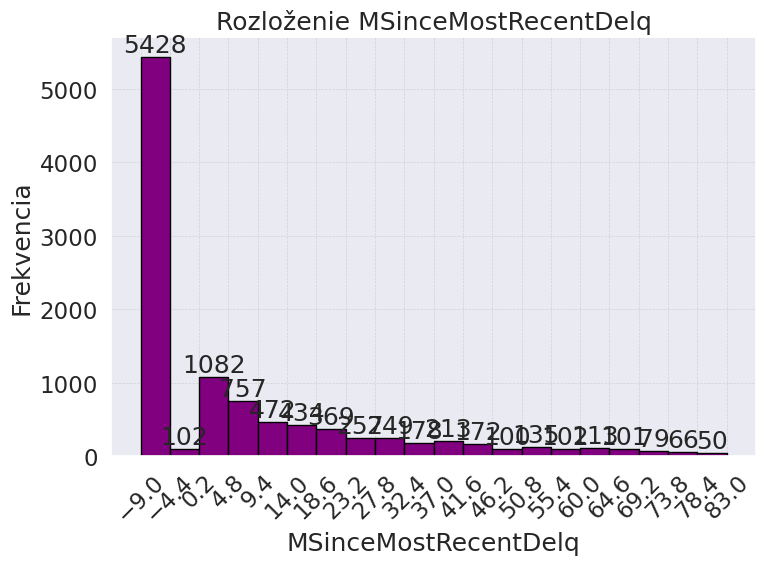

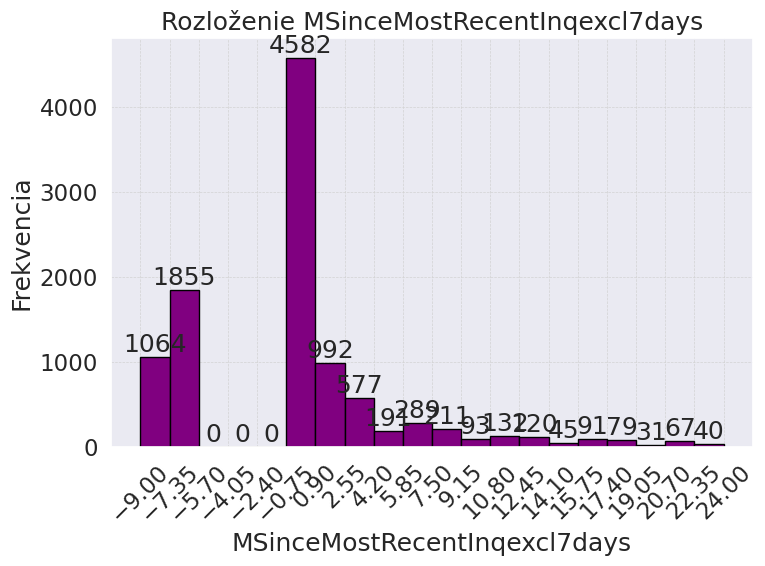

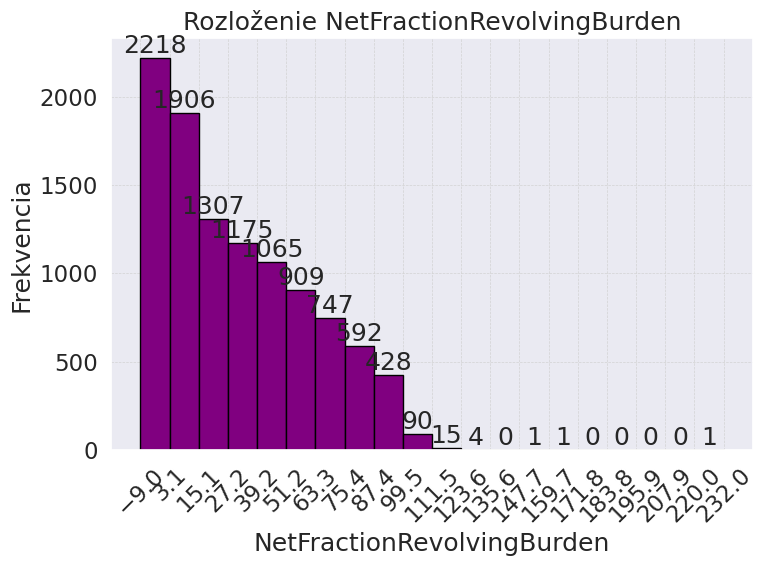

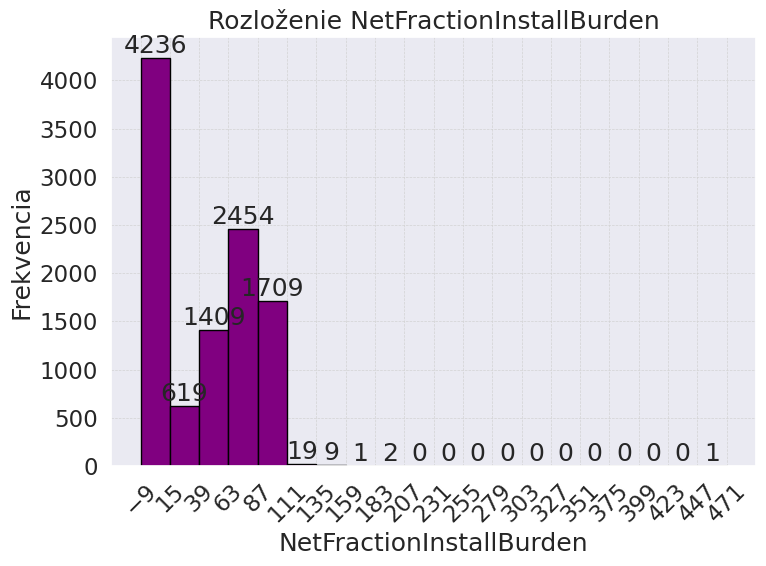

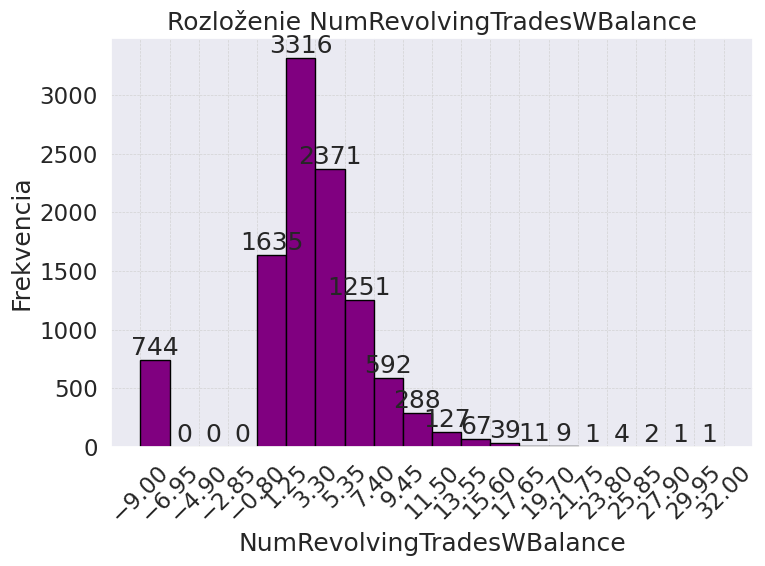

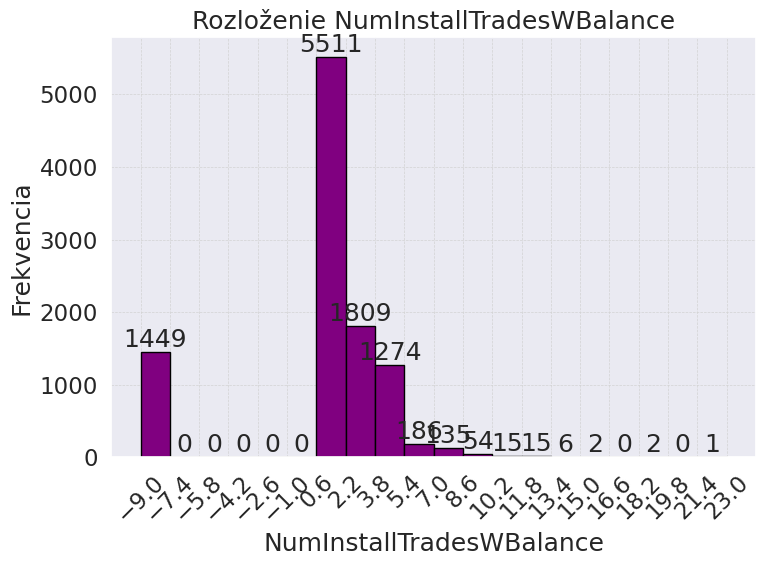

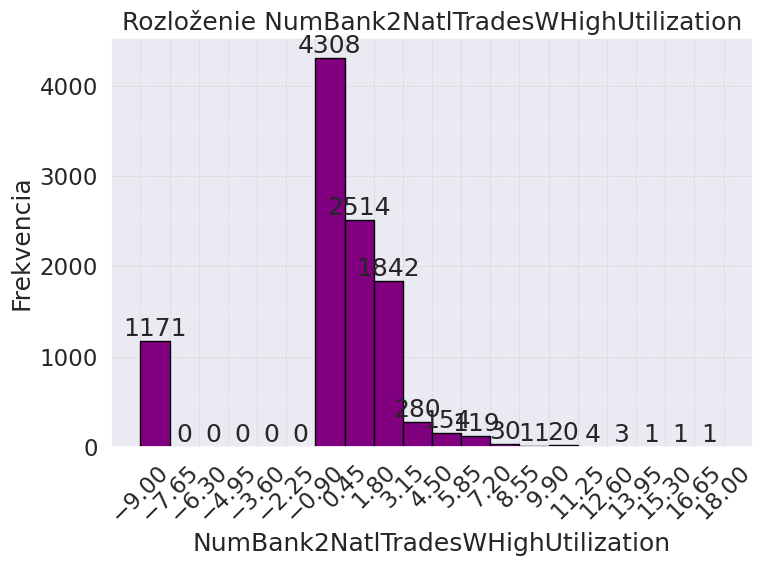

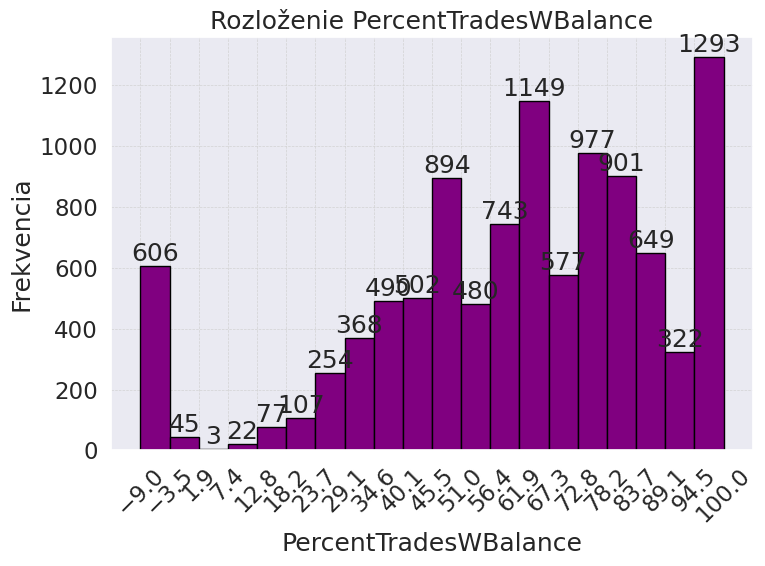

In [101]:
distribution_special_values(df)

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Záver:</h3>
    
Rozloženie premenných s chýbajúcimi hodnotami je neštandardné a asymetrické, čo sa prejaví pri nahradení premenných v budúcnosti. Priemerná hodnota je citlivá na extrémy a môže byť skreslená. V tomto prípade je lepšie použiť medián, pretože je odolnejší voči extrémom a lepšie zobrazuje typickú hodnotu v dátach.

</div>

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Krok 5.1 | Odstránenie -9</h3>
</div>

In [102]:
df = remove_minus_nine(df)

In [103]:
count_special_values(df)

                              Variable -9    -8    -7
0                      RiskPerformance  0     0     0
1                 ExternalRiskEstimate  0     0     0
2                MSinceOldestTradeOpen  0   239     0
3            MSinceMostRecentTradeOpen  0     0     0
4                       AverageMInFile  0     0     0
5                NumSatisfactoryTrades  0     0     0
6          NumTrades60Ever2DerogPubRec  0     0     0
7          NumTrades90Ever2DerogPubRec  0     0     0
8               PercentTradesNeverDelq  0     0     0
9                 MSinceMostRecentDelq  0   176  4658
10            MaxDelq2PublicRecLast12M  0     0     0
11                         MaxDelqEver  0     0     0
12                      NumTotalTrades  0     0     0
13              NumTradesOpeninLast12M  0     0     0
14                PercentInstallTrades  0     0     0
15        MSinceMostRecentInqexcl7days  0   476  1853
16                        NumInqLast6M  0     0     0
17               NumInqLast6

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Krok 5.2 | Rozdelenie na X a y vzorku</h3>
</div>

In [104]:
X = df.drop(columns=['RiskPerformance'])
y = df['RiskPerformance']

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Krok 5.3 | Percento chýbajúcich hodnôt pre každú premennú</h3>
</div>

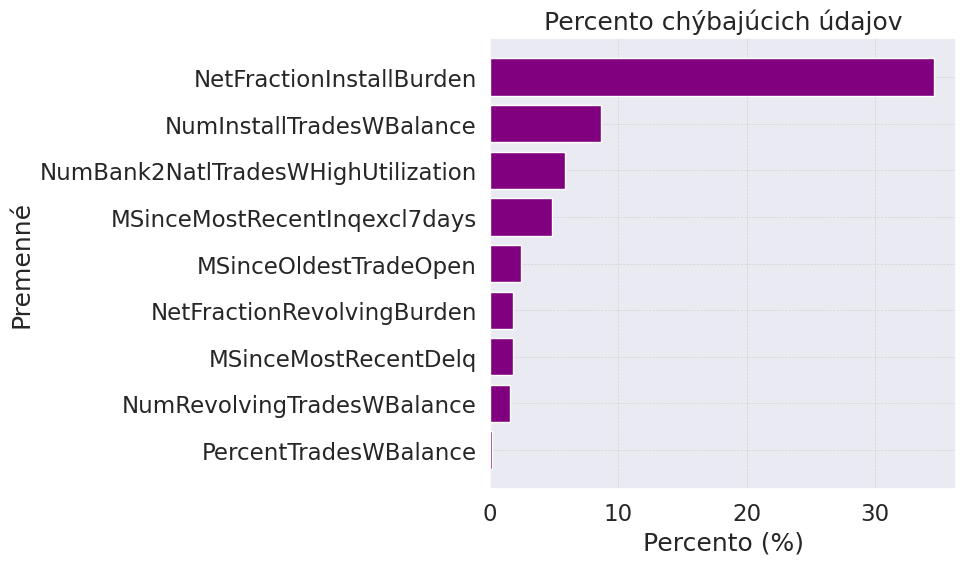

In [105]:
plot_missing_data_percentage(df)

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Záver:</h3>
    
Takmer 35% hodnôt pre premennú NetFractionInstallBurden chýba, čo predstavuje dostatočne veľkú časť údajov, a preto bude premenná odstránená. Premenné s percentuálnym podielom chýbajúcich údajov nižším ako 10% budú nahradené po dôkladnejšej analýze.

</div>

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Krok 5.3 | Odstránenie NetFractionInstallBurden</h3>
</div>

In [106]:
X.drop(columns=['NetFractionInstallBurden'], inplace=True)

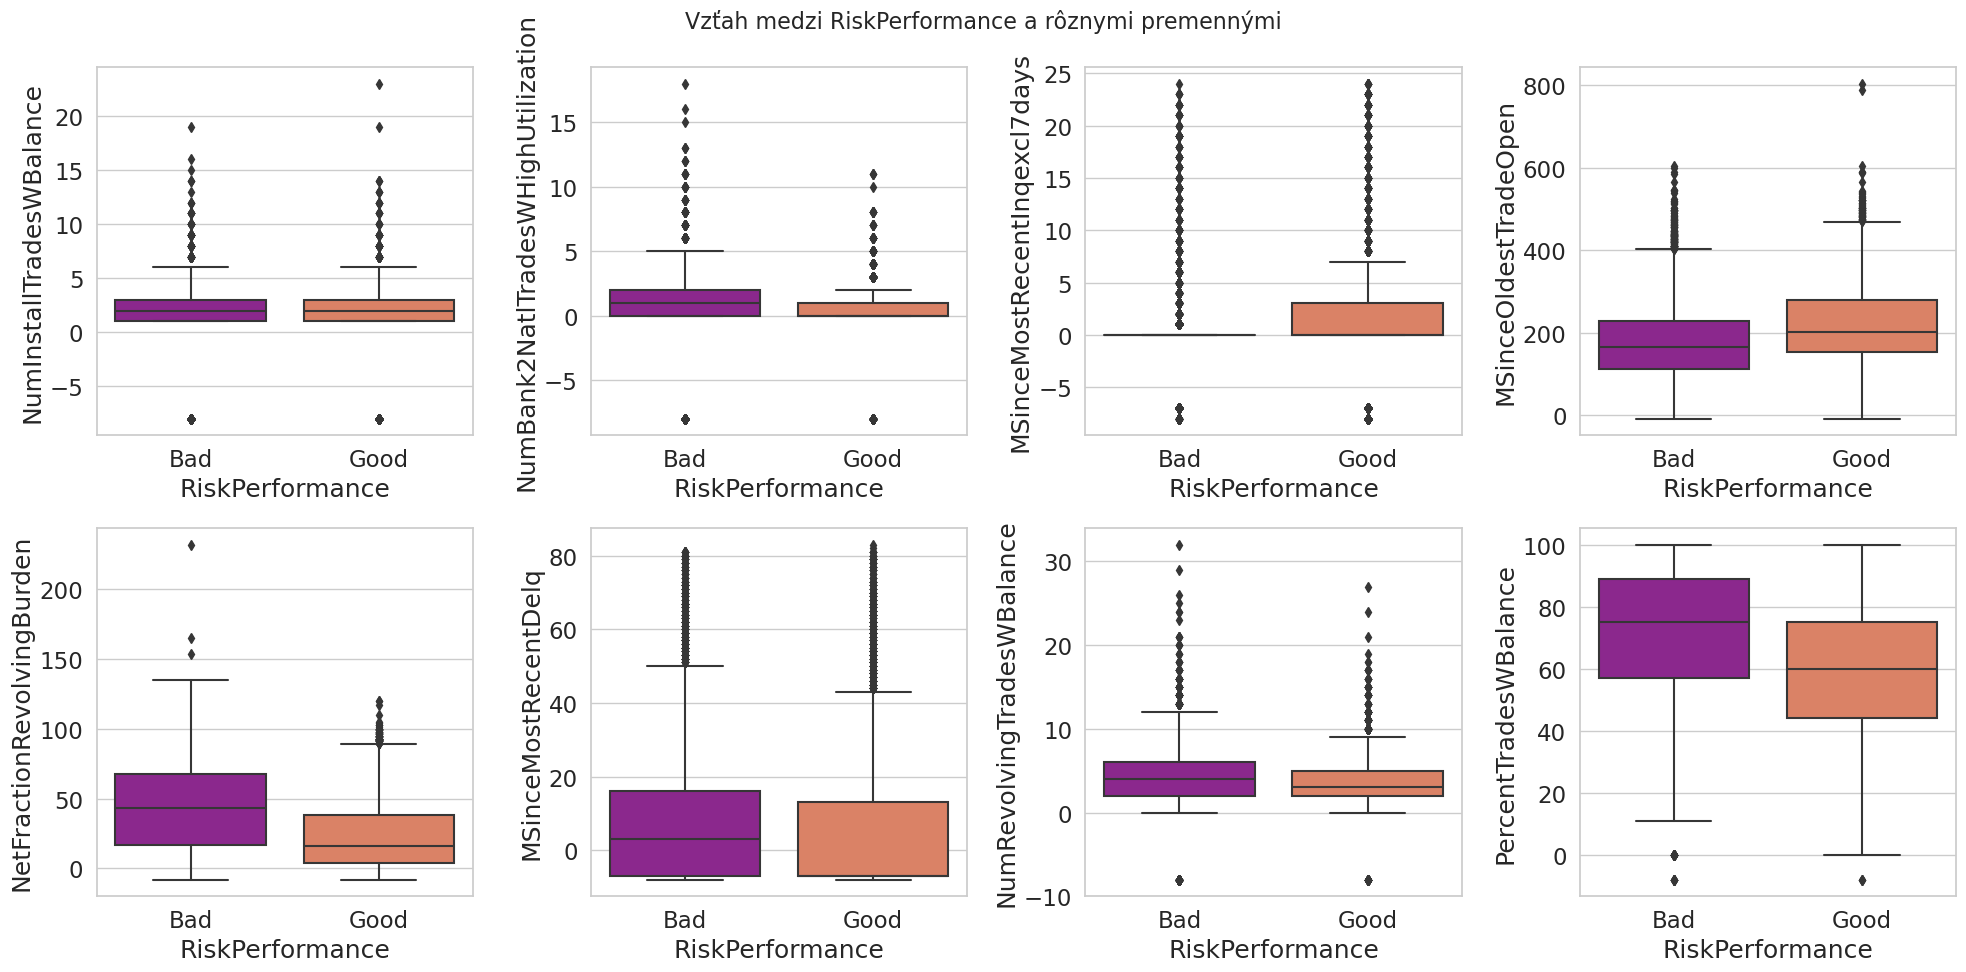

In [107]:
plot_boxplots(df)

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Záver:</h3>
    
- **NumInstallTradesWBalance:** rovnomerne rozdelenie hodnôt Good a Bad (zjednodušene "rozdelenie")
    -> nahradenie mediánom

- **NumBank2NatlTradesWHighUtilization:** nerovnomerne rozdelenie 
    ->  nahradenie podľa priemerov v kategóriách Good a Bad (zjednodušene "nahradenie GB")
    
- **MSinceMostRecentInqexcl7days:**  nerovnomerne rozdelenie -> nahradenie GB
    
- **NetFractionRevolvingBurden:** zaujímavá premenná, nerovnomerne rozdelenie -> nahradenie GB

- **náhrada mediánom kvôli veľmi nízkemu percentu chýbajúcich údajov:** MSinceOldestTradeOpen, MSinceMostRecentDelq, NumRevolvingTradesWBalance, PercentTradesWBalance

</div>

In [108]:
X = replace_special_value_with_median(X, 'NumInstallTradesWBalance', -8)
X = replace_special_value_with_median(X, 'MSinceOldestTradeOpen', -8)
X = replace_special_value_with_median(X, 'MSinceMostRecentDelq', -8)
X = replace_special_value_with_median(X, 'NumRevolvingTradesWBalance', -8)
X = replace_special_value_with_median(X, 'PercentTradesWBalance', -8)

X = replace_special_value_with_median(X, 'NumBank2NatlTradesWHighUtilization', -8)
X = replace_special_value_with_median(X, 'MSinceMostRecentInqexcl7days', -8)
X = replace_special_value_with_median(X, 'NetFractionRevolvingBurden', -8)

In [109]:
count_special_values(df)

                              Variable -9    -8    -7
0                      RiskPerformance  0     0     0
1                 ExternalRiskEstimate  0     0     0
2                MSinceOldestTradeOpen  0   239     0
3            MSinceMostRecentTradeOpen  0     0     0
4                       AverageMInFile  0     0     0
5                NumSatisfactoryTrades  0     0     0
6          NumTrades60Ever2DerogPubRec  0     0     0
7          NumTrades90Ever2DerogPubRec  0     0     0
8               PercentTradesNeverDelq  0     0     0
9                 MSinceMostRecentDelq  0   176  4658
10            MaxDelq2PublicRecLast12M  0     0     0
11                         MaxDelqEver  0     0     0
12                      NumTotalTrades  0     0     0
13              NumTradesOpeninLast12M  0     0     0
14                PercentInstallTrades  0     0     0
15        MSinceMostRecentInqexcl7days  0   476  1853
16                        NumInqLast6M  0     0     0
17               NumInqLast6

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Krok 6 | Nahradenie hodnôt Good a Bad hodnotami 1 a 0</h3>
</div>

In [110]:
y = y.replace({'Bad': 0, 'Good': 1})

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Krok 7 | Rozdelenie na trénovaciu a testovaciu vzorku</h3>
</div>

In [111]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Krok 8 | XGBoost</h3>
</div>

In [112]:
#**8.1: Hyperparameter Tuning**
"""
from sklearn.model_selection import GridSearchCV

CV = True

if CV:
    learning_rate =  [0.001, 0.01, 0.1]
    max_depth = np.arange(3,6)
    alpha = [0,2,10]
    colsample_bytree = [0,0.2,0.5]
    parameters = {'learning_rate': learning_rate, 'max_depth': max_depth,
                 'alpha': alpha, 'colsample_bytree':colsample_bytree}
    xgb_mod = xgb.XGBClassifier(objective='reg:logistic')
    xgb_mod = GridSearchCV(xgb_mod, parameters, scoring='f1', cv=5)
    xgb_mod.fit(X_train,y_train)
    print("The best parameters for XGB Classifier are %s with a score of %0.2f" % (xgb_mod.best_params_, xgb_mod.best_score_))
    
else: 
    xgb_mod = xgb.XGBClassifier(objective='reg:logistic', colsample_bytree=0.2, alpha=10,
                            learning_rate=0.1, max_depth=4, n_estimators=100)
    xgb_mod.fit(X_train,y_train)
    """
clear_output()

In [113]:
#n_estimators=500 - počet stromov vytvorených pre daný model
#learning_rate=0.05 - hodnota, o ktorú sa aktualizujú váhy stromov v každom kroku trénovania 
#early_stopping_rounds=5 - počet kôl, po ktorých sa trénovanie zastaví, ak sa kvalita modelu nezlepší

my_model = xgb.XGBClassifier(n_estimators=500, 
                             learning_rate=0.05, 
                             early_stopping_rounds=5)

#fit() - trénovanie modelu na dátach X_train, y_train
#eval_set=[(X_valid, y_valid)] - validačný súbor údajov, na ktorom sa bude hodnotiť výkonnosť modelu
#verbose=False - nezobrazovať informácie o procese učenia
my_model.fit(X_train, y_train, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

clear_output()


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      4112
           1       0.80      0.77      0.78      3776

    accuracy                           0.80      7888
   macro avg       0.80      0.80      0.80      7888
weighted avg       0.80      0.80      0.80      7888


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1016
           1       0.73      0.69      0.71       957

    accuracy                           0.73      1973
   macro avg       0.73      0.73      0.73      1973
weighted avg       0.73      0.73      0.73      1973





/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


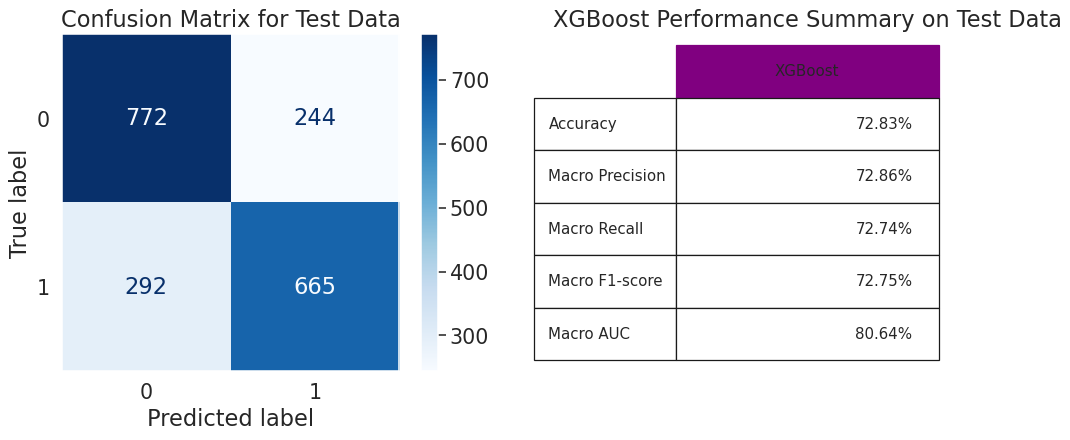

In [114]:
model_evaluation(my_model, X_train, X_valid, y_train, y_valid, 'XGBoost')

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Klienti</h3> 
    
Mladý architekt **John** sa rozhodol požiadať o úver na rekonštrukciu svojho novozakúpeného bytu. Na opravu bytu a potrebné úpravy chce použiť úverovú linku na financovanie bývania (HELOC). Aby získal odhad svojej úverovej bonity a možných podmienok úveru HELOC, John sa obrátil na finančného poradcu, ktorý mu odporučil použiť systém založený na umelej inteligencii, ktorý na základe historických údajov odhadne pravdepodobnosť schválenia úveru. Na získanie odhadu svojej žiadosti o úver HELOC musel John poskytnúť rôzne finančné informácie:

(Poznámka: vynechané hodnoty v stĺpci "Váha" znamenajú, že premenná môže mať hodnoty od 0, horná hranica nie je stanovená.)
    
| Feature                                 | John  |    Rozsah  |
|-----------------------------------------|-------|------------|
| ExternalRiskEstimate                    | 84    | 0-100      |
| MSinceOldestTradeOpen                   | 273   |            |
| MSinceMostRecentTradeOpen               | 6     |            |
| AverageMInFile                          | 119   |            |
| NumSatisfactoryTrades                   | 19    |            |
| NumTrades60Ever2DerogPubRec             | 0     |            |
| NumTrades90Ever2DerogPubRec             | 0     |            |
| PercentTradesNeverDelq                  | 95    | 0-100      |
| MSinceMostRecentDelq                    | 25    |            |
| MaxDelq2PublicRecLast12M                | 6     | 0-7        |
| MaxDelqEver                             | 6     | 2-8        |
| NumTotalTrades                          | 19    |            |
| NumTradesOpeninLast12M                  | 1     |            |
| PercentInstallTrades                    | 16    | 0-100      |
| MSinceMostRecentInqexcl7days            | 0     |            |
| NumInqLast6M                            | 2     |            |
| NumInqLast6Mexcl7days                   | 2     |            |
| NetFractionRevolvingBurden              | 3     |            |
| NumRevolvingTradesWBalance              | 2     |            |
| NumInstallTradesWBalance                | 1     |            |
| NumBank2NatlTradesWHighUtilization      | 0     |            |
| PercentTradesWBalance                   | 30    | 0-100      |

</div>

In [115]:
john = X_valid.iloc[10]
var = y_valid.iloc[10]
john
#var

ExternalRiskEstimate                   84
MSinceOldestTradeOpen                 273
MSinceMostRecentTradeOpen               6
AverageMInFile                        119
NumSatisfactoryTrades                  19
NumTrades60Ever2DerogPubRec             0
NumTrades90Ever2DerogPubRec             0
PercentTradesNeverDelq                 95
MSinceMostRecentDelq                   25
MaxDelq2PublicRecLast12M                6
MaxDelqEver                             6
NumTotalTrades                         19
NumTradesOpeninLast12M                  1
PercentInstallTrades                   16
MSinceMostRecentInqexcl7days            0
NumInqLast6M                            2
NumInqLast6Mexcl7days                   2
NetFractionRevolvingBurden              3
NumRevolvingTradesWBalance              2
NumInstallTradesWBalance                1
NumBank2NatlTradesWHighUtilization      0
PercentTradesWBalance                  30
Name: 1532, dtype: int64

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Krok 9 | SHAP</h3>
</div>

In [116]:
#Importovanie knižníc
!pip install git+https://github.com/shap/shap.git@master
import shap
clear_output()

In [117]:
#vytvorenie objektu explainer pomocou triedy shap.Explainer, ktorý bude slúžiť na vysvetlenie práce my_model.
explainer = shap.Explainer(my_model)

#vypočítanie hodnôt SHAP pre validačnú množinu X_valid
shap_values = explainer(X_valid)

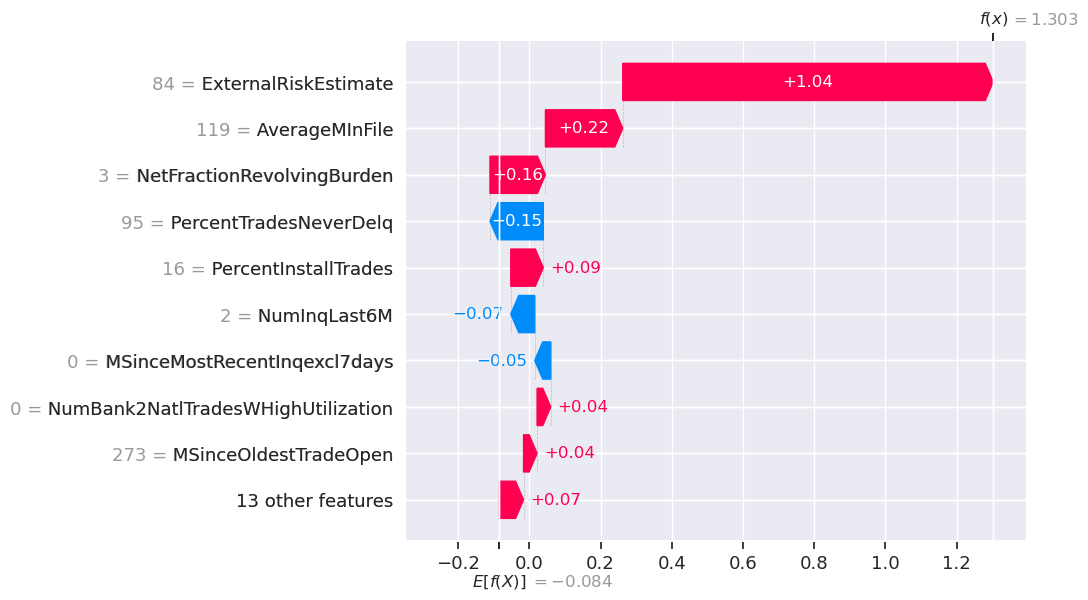

In [118]:
#definícia indexu vzorky, pre ktorú sa budú vizualizovať SHAP hodnoty
john_id = 10

#Vykreslenie hodnôt SHAP pre vzorku s indexom john_id. 
shap.plots.waterfall(shap_values[john_id], show=True)

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Krok 10 | LIME</h3>
</div>

In [119]:
!pip install lime
import lime
import lime.lime_tabular
clear_output()

In [120]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Bad', 'Good'])

In [121]:
#sample_idx = 1665
sample = X_valid.iloc[john_id]
explanation = explainer.explain_instance(sample.values, my_model.predict_proba, num_features=8)
explanation.show_in_notebook()

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Krok 11 | Anchor</h3>
</div>

In [122]:
!pip install anchor-exp
from anchor import utils
from anchor import anchor_tabular
clear_output()

In [123]:
explainer = anchor_tabular.AnchorTabularExplainer(
    class_names=['Bad', 'Good'],  
    feature_names=X_train.columns,
    train_data=X_train.values,
)


In [124]:
#idx = 1665
np.random.seed(1)
exp = explainer.explain_instance(X_valid.values[john_id], my_model.predict, threshold=0.95)

In [125]:
#print('John Result: % - (Good)' % y_valid[john_id])
#y_valid[john_id]

print(f'John Result: {y_valid[john_id]} (Good)')

John Result: 1 (Good)


In [126]:
print(f'John Result: {y_valid[john_id]} (Good)\n')
print('Anchors:')
print('%s' % (' AND\n'.join(exp.names())))
print('Precision: %.2f' % exp.precision())
print('Coverage: %.2f' % exp.coverage())

John Result: 1 (Good)

Anchors:
ExternalRiskEstimate > 80.00 AND
MSinceOldestTradeOpen > 256.00 AND
NetFractionRevolvingBurden <= 9.00
Precision: 0.98
Coverage: 0.06


<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Krok 12 | PDP</h3>
</div>

In [127]:
from sklearn.inspection import PartialDependenceDisplay

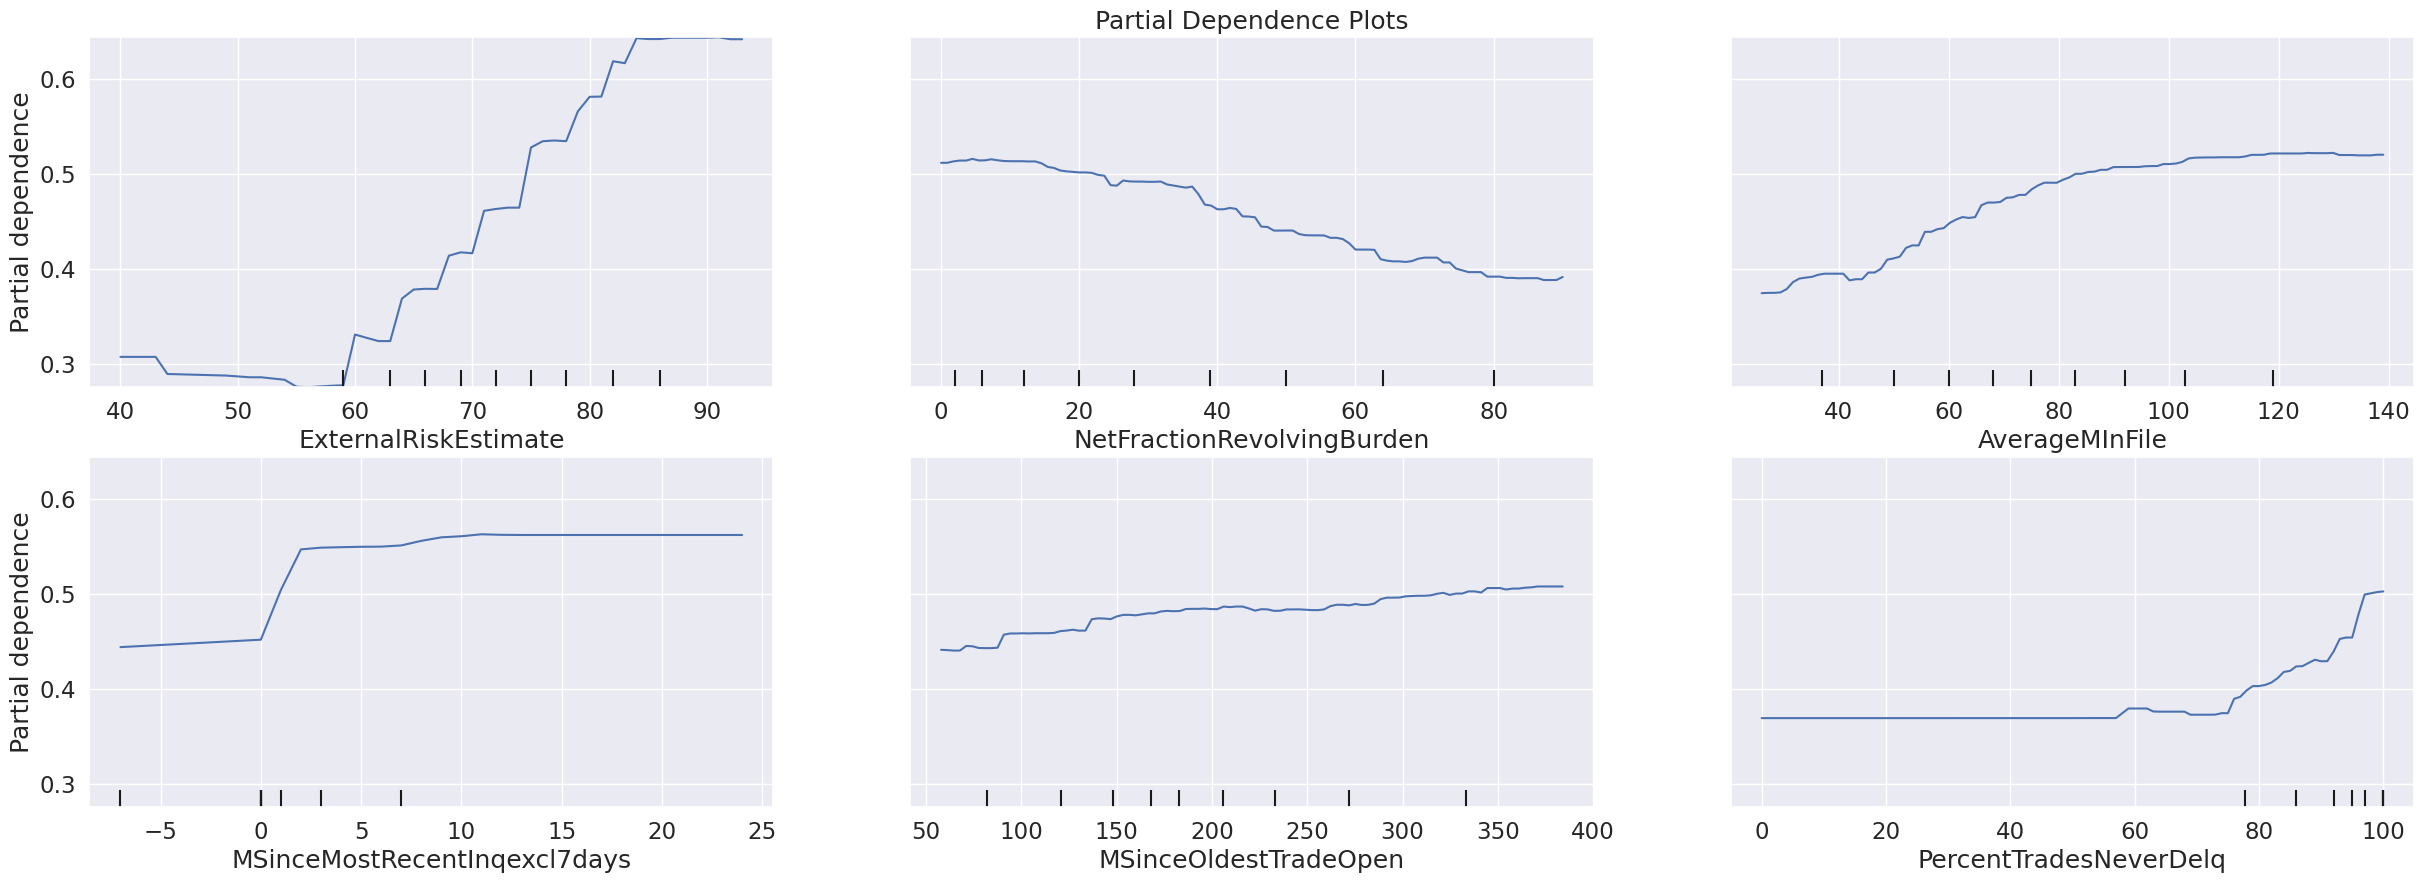

In [128]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=my_model,
    X=X_valid,
    features=('ExternalRiskEstimate', 'NetFractionRevolvingBurden', 'AverageMInFile', 'MSinceMostRecentInqexcl7days','MSinceOldestTradeOpen', 'PercentTradesNeverDelq'), 
    random_state=5,
    ax=ax,
    kind='average',
    grid_resolution = 100,   
)

plt.show()

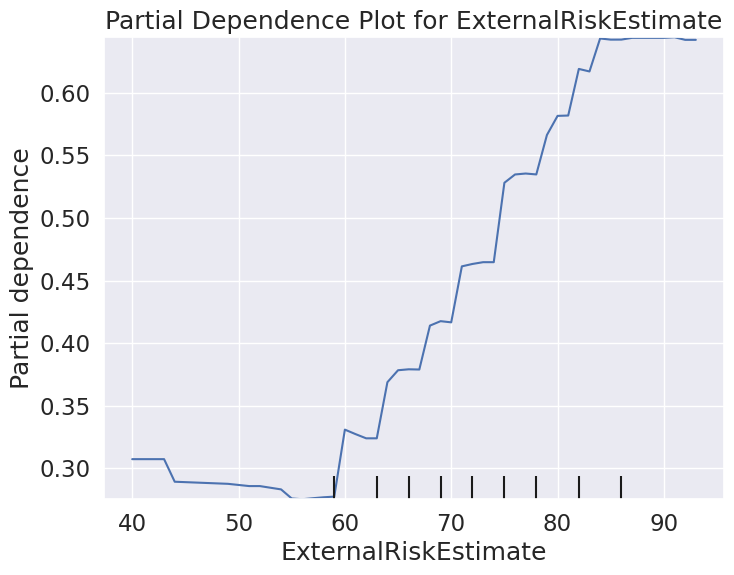

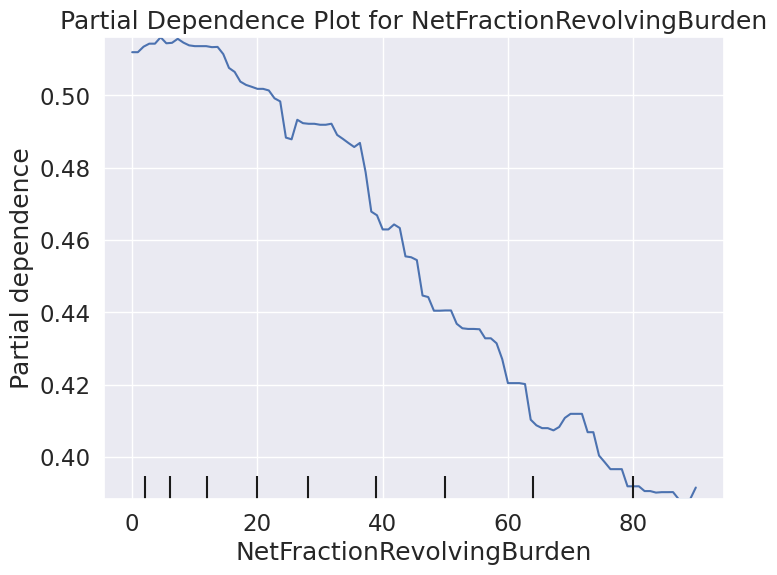

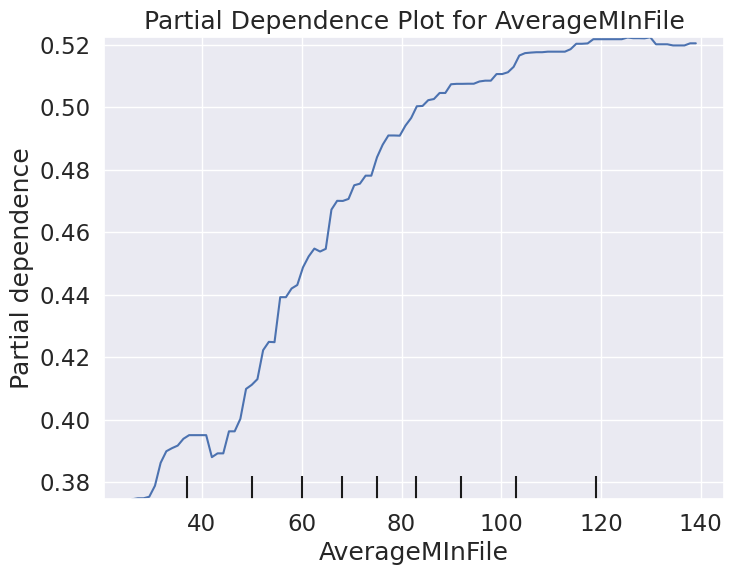

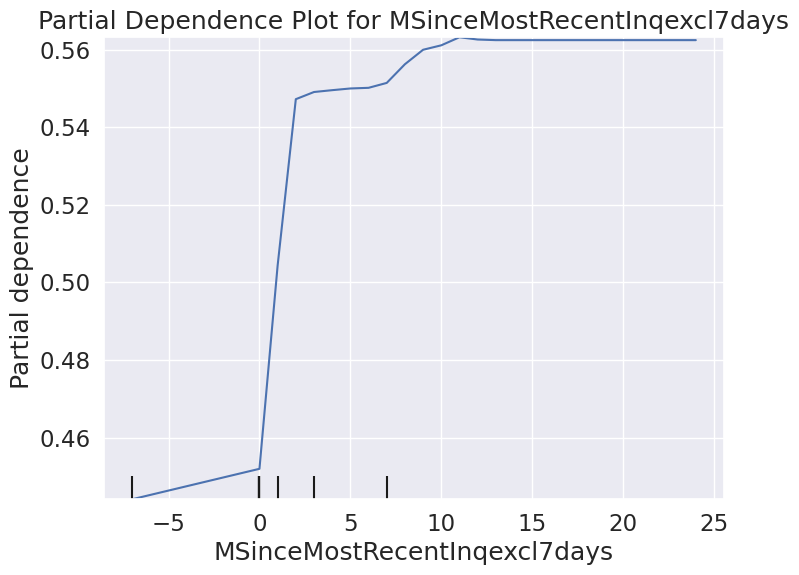

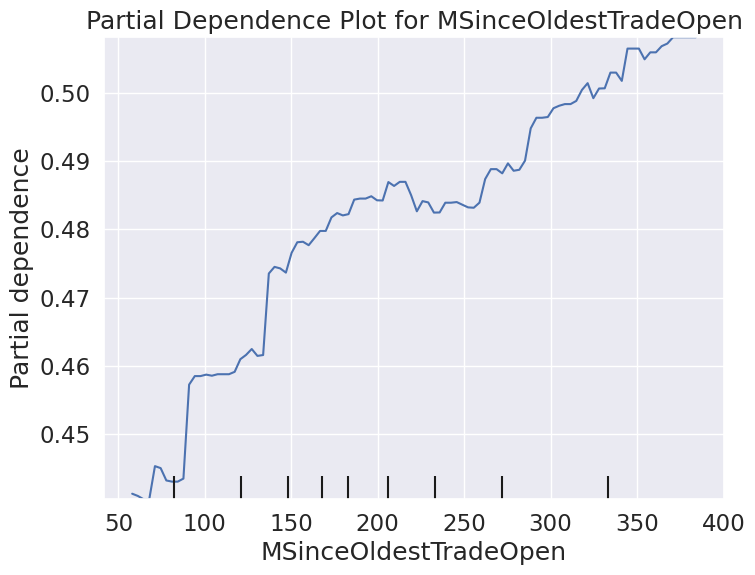

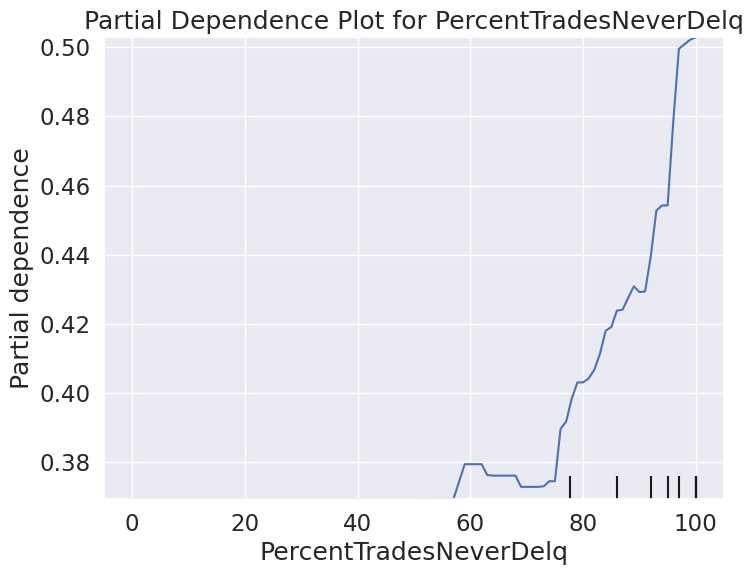

In [129]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

features_to_plot = ('ExternalRiskEstimate', 'NetFractionRevolvingBurden', 'AverageMInFile', 'MSinceMostRecentInqexcl7days','MSinceOldestTradeOpen', 'PercentTradesNeverDelq')

for feature in features_to_plot:
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title(f"Partial Dependence Plot for {feature}")
    PartialDependenceDisplay.from_estimator(
        estimator=my_model,
        X=X_valid,
        features=[feature], 
        random_state=5,
        ax=ax,
        kind='average',
        grid_resolution=100,
    )
    plt.show()


<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Krok 13 | ALE</h3>
</div>

In [130]:
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython
from alepython import ale_plot
import matplotlib as mpl
clear_output()

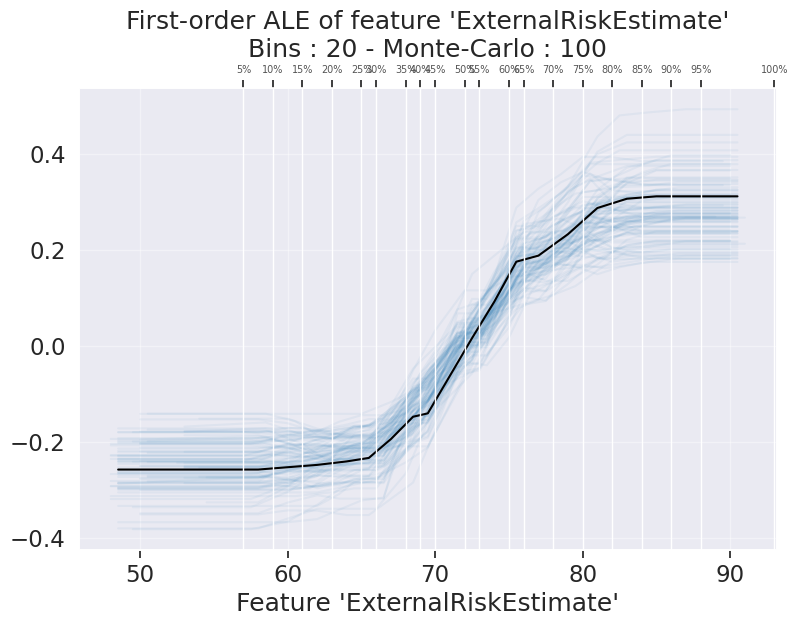

<AxesSubplot:title={'center':"First-order ALE of feature 'ExternalRiskEstimate'\nBins : 20 - Monte-Carlo : 100"}, xlabel="Feature 'ExternalRiskEstimate'">

In [131]:
mpl.rc("figure", figsize=(9, 6))
ale_plot(
    my_model,
    X_valid,
    X_valid.columns[:1],
    bins=20,
    monte_carlo=True,
    monte_carlo_rep=100,
    monte_carlo_ratio=0.6,
)

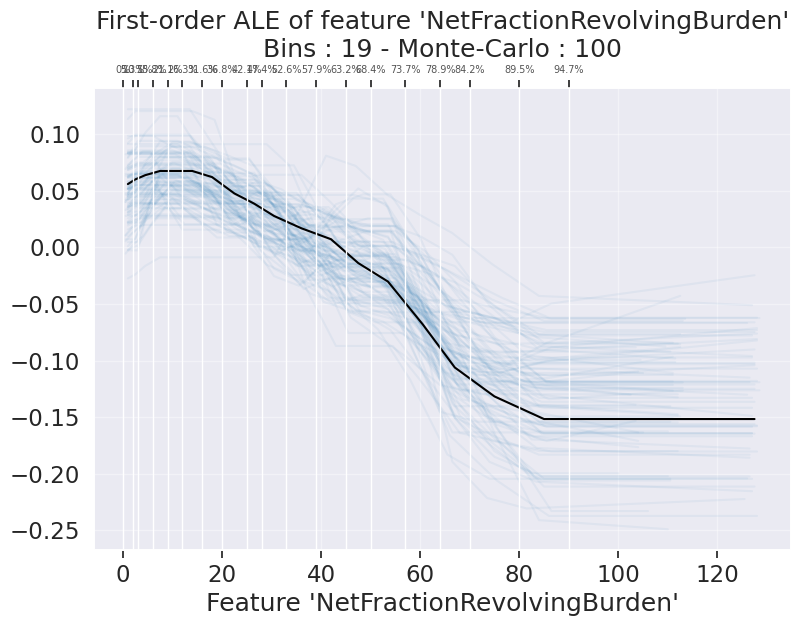

<AxesSubplot:title={'center':"First-order ALE of feature 'NetFractionRevolvingBurden'\nBins : 19 - Monte-Carlo : 100"}, xlabel="Feature 'NetFractionRevolvingBurden'">

In [132]:
mpl.rc("figure", figsize=(9, 6))
ale_plot(
    my_model,
    X_valid,
    features='NetFractionRevolvingBurden',
    bins=20,
    monte_carlo=True,
    monte_carlo_rep=100,
    monte_carlo_ratio=0.6,
)

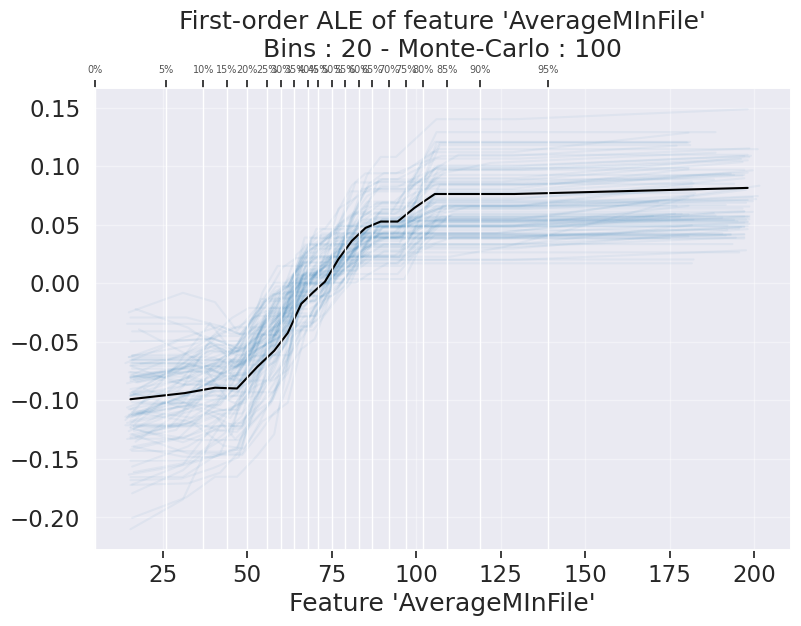

<AxesSubplot:title={'center':"First-order ALE of feature 'AverageMInFile'\nBins : 20 - Monte-Carlo : 100"}, xlabel="Feature 'AverageMInFile'">

In [133]:
mpl.rc("figure", figsize=(9, 6))
ale_plot(
    my_model,
    X_valid,
    features='AverageMInFile',
    bins=20,
    monte_carlo=True,
    monte_carlo_rep=100,
    monte_carlo_ratio=0.6,
)

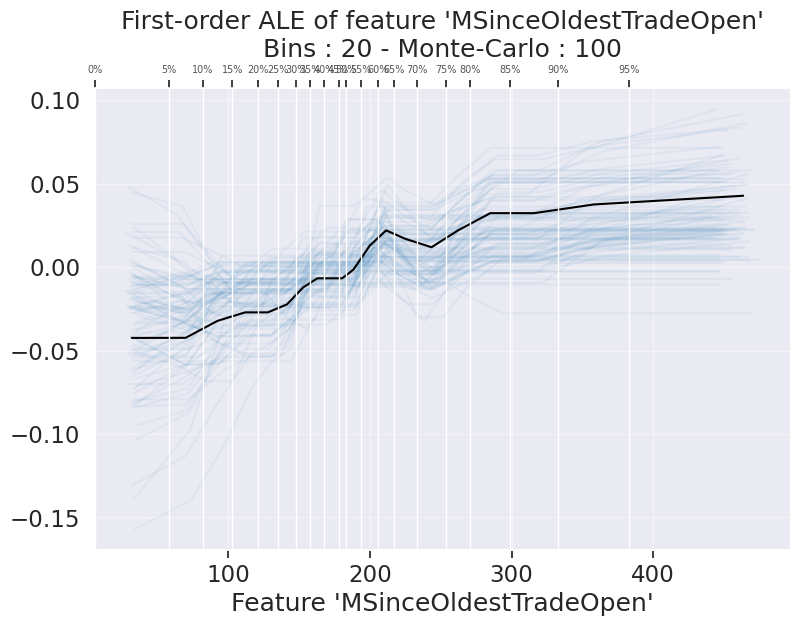

<AxesSubplot:title={'center':"First-order ALE of feature 'MSinceOldestTradeOpen'\nBins : 20 - Monte-Carlo : 100"}, xlabel="Feature 'MSinceOldestTradeOpen'">

In [134]:
mpl.rc("figure", figsize=(9, 6))
ale_plot(
    my_model,
    X_valid,
    features='MSinceOldestTradeOpen',
    bins=20,
    monte_carlo=True,
    monte_carlo_rep=100,
    monte_carlo_ratio=0.6,
)

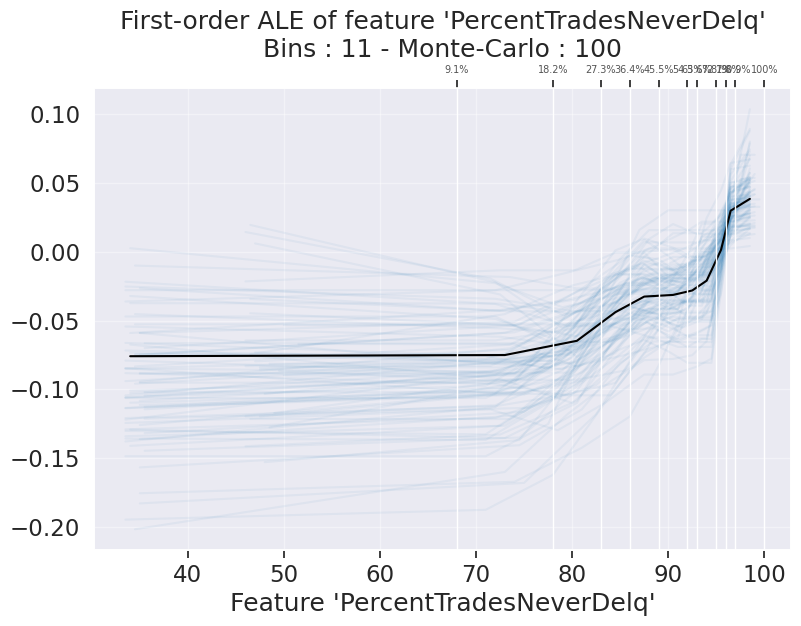

<AxesSubplot:title={'center':"First-order ALE of feature 'PercentTradesNeverDelq'\nBins : 11 - Monte-Carlo : 100"}, xlabel="Feature 'PercentTradesNeverDelq'">

In [135]:
mpl.rc("figure", figsize=(9, 6))
ale_plot(
    my_model,
    X_valid,
    features='PercentTradesNeverDelq',
    bins=20,
    monte_carlo=True,
    monte_carlo_rep=100,
    monte_carlo_ratio=0.6,
)

In [ ]:
mpl.rc("figure", figsize=(9, 6))
ale_plot(
    my_model,
    X_valid,
    features='MSinceMostRecentInqexcl7days',
    bins=20,
    monte_carlo=True,
    monte_carlo_rep=100,
    monte_carlo_ratio=0.6,
)

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;color: black">
<h3>Krok 14 | Porovnanie metód</h3>
    https://pypi.org/project/xai-benchmark/
</div>

In [ ]:
from IPython.display import clear_output

In [ ]:
!pip install aix360
clear_output()

In [ ]:
from aix360.metrics.local_metrics import faithfulness_metric

In [ ]:
#base_values vypočíta priemernú hodnotu všetkých premenných v súbore údajov X.
base_values = np.mean(X, axis=0)

#konverzia na numpy array
base = np.array([base_values])

#base_scalar konvertuje pole base na jednorozmerné pole
base_scalar = base.flatten()

In [ ]:
base_scalar

In [ ]:
##########SHAP
#Vypočítame hodnotu faithfulness_metric

In [ ]:
#x_array obsahuje hodnoty pre konkrétny riadok dát
x_array = john.values  

#shap_array obsahuje hodnoty SHAP pre x_array
shap_array = shap_values[john_id].values 

In [ ]:
#base_scalar je základná hodnota
base_scalar = base.flatten()

#my_model - model ML, vysvetlený pomocou SHAP
shap_faithfulness = faithfulness_metric(my_model, x_array, shap_array, base_scalar)
shap_faithfulness

In [ ]:
###########LIME
#Vypočítame hodnotu faithfulness_metric

In [ ]:
#sample obsahuje vzorku z X_valid množiny dát, ktorá je indexovaná podľa john_id
sample = X_valid.iloc[john_id]

#explainer_1 - objekt explaineru LIME, vytvorený na základe X_train dát 
explainer_1 = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Bad', 'Good'])

In [ ]:
#explainer_1 sa snaží vysvetliť predikciu modelu my_model.predict_proba, pričom sa použije maximálne 22 príznakov
explanation_1 = explainer_1.explain_instance(sample.values, my_model.predict_proba, num_features=22)

In [ ]:
lime_explanation = explanation_1.as_list()

In [ ]:
#lime_feature_importance obsahuje dôležitosť príznakov, kde kľúč je názov príznaku a hodnota je jeho dôležitosť
lime_feature_importance = {name: importance for name, importance in lime_explanation}

#konverzia na numpy array
lime_importance_array = np.array(list(lime_feature_importance.values()))

In [ ]:
lime_faithfulness = faithfulness_metric(my_model, x_array, lime_importance_array, base_scalar)

In [ ]:
lime_faithfulness

In [ ]:
#Vypočítame hodnotu monotonicity_metric pre SHAP a LIME

In [ ]:
from aix360.metrics.local_metrics import monotonicity_metric

In [ ]:
#my_model - model ML, vysvetlený pomocou SHAP
#x_array - hodnoty premennych pre riadok (john_id)
#shap_array - hodnoty SHAP pre riadok (john_id)
#base_scalar - základná hodnota
shap_monotonicity = monotonicity_metric(my_model, x_array, shap_array, base_scalar)
shap_monotonicity

In [ ]:
lime_monotonicity = monotonicity_metric(my_model, x_array, lime_importance_array, base_scalar)
lime_monotonicity